In [503]:
import pandas as pd
import seaborn as sns

## Data cleaning

### Data import

In [504]:
url = r"..\data\raw\clean_house.csv"
house = pd.read_csv(url, sep=",")

In [505]:
house.head(3)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik


In [506]:
print("There are {} rows of data".format(len(statehouse)))

There are 139 rows of data


In [507]:
ehouse = house[house["province"] == "limburg"]
ehouse = ehouse[ehouse["state_of_building"] == "GOOD"]
thouse = ehouse[["price", "number_of_rooms", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]

<Axes: >

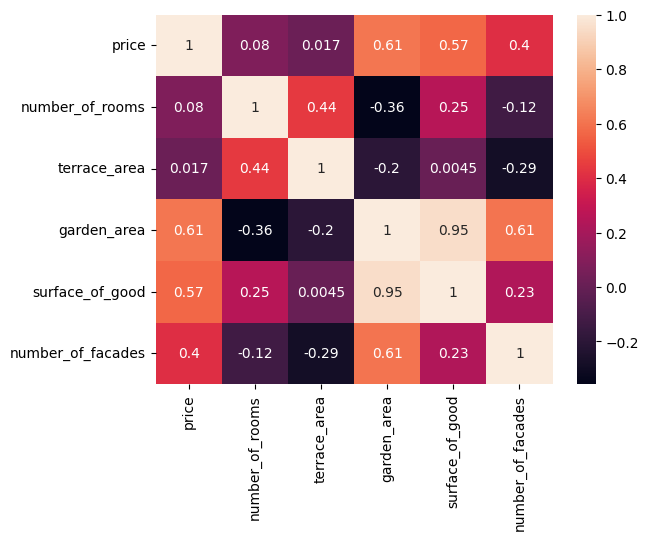

In [508]:
sns.heatmap(thouse.corr(), annot=True)

Subsetting data to the state of the building

In [509]:
statehouse = house[(house["province"] == "limburg")]
statehouse = statehouse[statehouse["state_of_building"] == "GOOD"]
statehouse.isnull().sum()
statehouse.head(7)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
133,11162281,paal,3583,51.056172,5.180513,HOUSE,HOUSE,365000.0,BUY_REGULAR,NaN,...,NaN,NaN,1.0,NaN,11.0,4.0,NaN,GOOD,beringen,limburg
216,11134157,tongeren,3700,50.766421,5.533364,HOUSE,HOUSE,169000.0,BUY_REGULAR,NaN,...,1.0,19.0,1.0,360.0,442.0,3.0,0.0,GOOD,tongeren,limburg
609,11161296,houthalen,3530,51.040263,5.372588,HOUSE,HOUSE,595000.0,BUY_REGULAR,NaN,...,1.0,NaN,1.0,NaN,1794.0,4.0,1.0,GOOD,houthalen-helchteren,limburg
670,11161072,houthalen-helchteren,3530,51.024013,5.383692,HOUSE,HOUSE,330000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,1290.0,4.0,NaN,GOOD,houthalen-helchteren,limburg
804,11160448,sint-truiden,3800,50.814597,5.170109,HOUSE,HOUSE,265000.0,BUY_REGULAR,1.0,...,1.0,15.0,1.0,15.0,105.0,2.0,NaN,GOOD,sint-truiden,limburg
806,11160447,lummen,3560,51.010692,5.203587,HOUSE,HOUSE,474410.0,BUY_REGULAR,1.0,...,NaN,NaN,NaN,NaN,500.0,3.0,NaN,GOOD,lummen,limburg
808,11160446,lummen,3560,51.010692,5.203587,HOUSE,HOUSE,450210.0,BUY_REGULAR,1.0,...,NaN,NaN,NaN,NaN,481.0,3.0,NaN,GOOD,lummen,limburg


Replacing value in garden with numeric value

In [510]:
condition_1 = (statehouse['garden'] == 1) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_1, 'garden_area'] = statehouse['garden_area'].median()
condition_2 = (statehouse['garden'] == 0) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_2, 'garden_area'] = 0
condition_3 = (statehouse['garden'].isnull()) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_3, 'garden_area'] = -1

Replacing values in terrace with numeric values

In [511]:
condition_1 = (statehouse['terrace'] == 1) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_1, 'terrace_area'] = statehouse['terrace_area'].median()
condition_2 = (statehouse['terrace'] == 0) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_2, 'terrace_area'] = 0
condition_3 = (statehouse['terrace'].isnull()) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_3, 'terrace_area'] = -1

Replacing values in number_of_rooms with the median

In [512]:
statehouse["number_of_rooms"].mean(), statehouse["number_of_rooms"].median()
condition_1 = (statehouse["number_of_rooms"].isnull())
statehouse.loc[condition_1, "number_of_rooms"] = statehouse["number_of_rooms"].median()

Replacing values in number of facades with mean

In [513]:
statehouse["number_of_facades"].mean(), round(statehouse["number_of_facades"].median())
condition_1 = (statehouse["number_of_facades"].isnull())
statehouse.loc[condition_1, "number_of_facades"] = statehouse["number_of_facades"].median()

In [514]:
statehouse.groupby("property_subtype")["price"].mean()

property_subtype
BUNGALOW              303500.000000
HOUSE                 397379.866667
MIXED_USE_BUILDING    335651.437500
VILLA                 727928.571429
Name: price, dtype: float64

Hot-Encoding the Categorical columns

In [515]:
statehouse["property_subtype"].nunique(), statehouse["property_subtype"].unique()
statehouse = pd.get_dummies(statehouse, columns=["property_subtype"], dtype=int)

adding a value column for propery subtype

In [516]:
statehouse["property_type_n"] = statehouse.apply(lambda x: 
    1 if x["property_subtype_BUNGALOW"] == 1 
    else (2 if x["property_subtype_MIXED_USE_BUILDING"] == 1 
    else (3 if x["property_subtype_HOUSE"] == 1 
    else (4 if x["property_subtype_VILLA"] == 1 
    else None))), axis=1)


The cleaned dataframe

In [517]:
corrhouse = statehouse[["price", "number_of_rooms", "terrace_area", "garden_area", "surface_of_good", "number_of_facades", "property_type_n"]]
print(round(corrhouse["number_of_facades"].mean()), len(corrhouse))
corrhouse.isnull().sum()

4 139


price                0
number_of_rooms      0
terrace_area         0
garden_area          0
surface_of_good      0
number_of_facades    0
property_type_n      0
dtype: int64

The correlation in the dataframe in a heatmap

<Axes: >

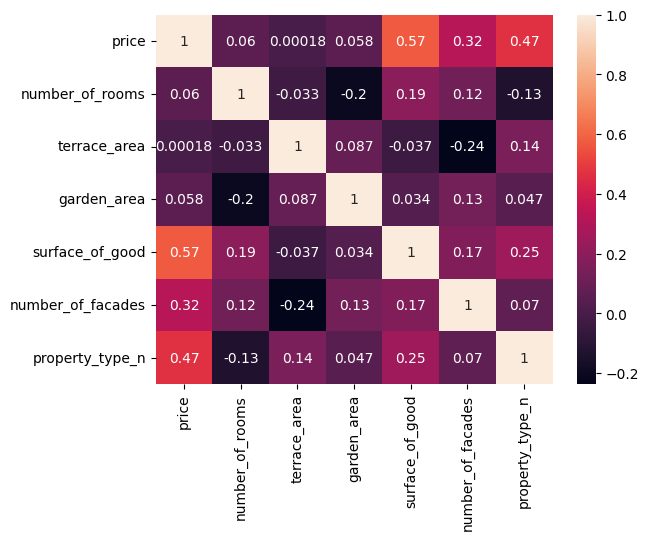

In [518]:
sns.heatmap(corrhouse.corr(), annot=True)